## Install dependencies

In [3]:
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
! git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16517, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16517 (delta 47), reused 50 (delta 16), pack-reused 16402
Receiving objects: 100% (16517/16517), 15.17 MiB | 8.42 MiB/s, done.
Resolving deltas: 100% (11304/11304), done.


## Installing model

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/user/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-20 Python-3.10.6 torch-2.2.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make detections with a dog image

In [6]:
image = 'raw_data/teacup-poodle.jpeg'

In [7]:
results = model(image)
results.print()

image 1/1: 512x768 1 dog, 1 teddy bear
Speed: 22.2ms pre-process, 123.2ms inference, 1.7ms NMS per image at shape (1, 3, 448, 640)


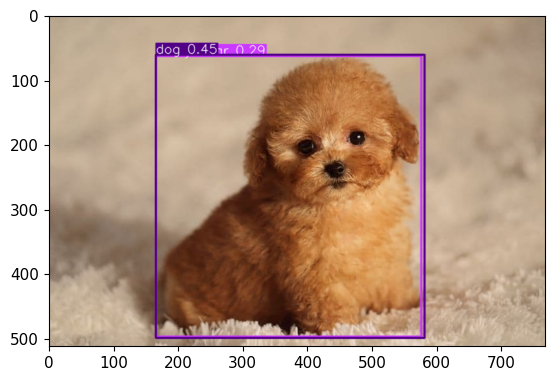

In [8]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        [[184, 166, 142],
         [184, 166, 142],
         [184, 166, 142],
         ...,
         [157, 139, 117],
         [157, 139, 117],
         [157, 139, 117]],
 
        ...,
 
        [[180, 162, 140],
         [179, 161, 139],
         [180, 162, 140],
         ...,
         [189, 169, 145],
         [188, 168, 144],
         [187, 167, 143]],
 
        [[181, 163, 141],
         [178, 160, 138],
         [176, 158, 136],
         ...,
         [190, 170, 146],
         [189, 169, 145],
         [189, 169, 145]],
 
        [[186, 168, 146],
         [181, 163, 141],
         [177, 159, 137],
         ...,
         [193, 173, 149],
  

## Real Time Detections

In [7]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2024-03-20 22:41:40.174 python[1236:10248] _TIPropertyValueIsValid called with 4 on nil context!
2024-03-20 22:41:40.174 python[1236:10248] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2024-03-20 22:41:40.174 python[1236:10248] Text input context does not respond to _valueForTIProperty:
2024-03-20 22:41:40.175 python[1236:10248] _TIPropertyValueIsValid called with 4 on nil context!
2024-03-20 22:41:40.175 python[1236:10248] imkxpc_getApplicationProperty:reply: called with incorrect property value 4, bailing.
2024-03-20 22:41:40.175 python[1236:10248] Text input context does not respond to _valueForTIProperty:


KeyboardInterrupt: 

: 

In [1]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('raw_data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()